In [1]:
import numpy as np
from scipy import signal, io
from matplotlib import pyplot as plt
from scipy import signal
from copy import deepcopy

In [2]:
num = 128
filename = './n0' + str(num) + '_LGS_trs.sav'
telemetry = io.readsav(filename)['a']
print(telemetry.dtype)

(numpy.record, [(('conf_id', 'CONF_ID'), 'O'), (('timestamp', 'TIMESTAMP'), 'O'), (('subapintensity', 'SUBAPINTENSITY'), 'O'), (('offsetcentroid', 'OFFSETCENTROID'), 'O'), (('residualwavefront', 'RESIDUALWAVEFRONT'), 'O'), (('dmcommand', 'DMCOMMAND'), 'O'), (('dmcommandsclipped', 'DMCOMMANDSCLIPPED'), 'O'), (('residualrms', 'RESIDUALRMS'), 'O'), (('ttcommands', 'TTCOMMANDS'), 'O'), (('ttstraingauge', 'TTSTRAINGAUGE'), 'O'), (('ttcommandsclipped', 'TTCOMMANDSCLIPPED'), 'O')])


In [3]:
telemetry = io.readsav(filename)['a']
commands = deepcopy(telemetry['TTCOMMANDS'][0])
commands = commands - np.mean(commands, axis=0)
residuals = telemetry['RESIDUALWAVEFRONT'][0][:,349:351]

In [4]:
pol = residuals[1:] + commands[:-1]

(1e-10, 3.4215530000878753)

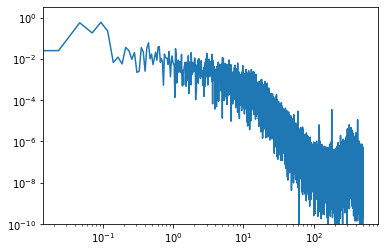

In [10]:
plt.loglog(*signal.periodogram(pol[:,0], fs=1000))
plt.ylim(1e-10)

(1e-09, 0.001)

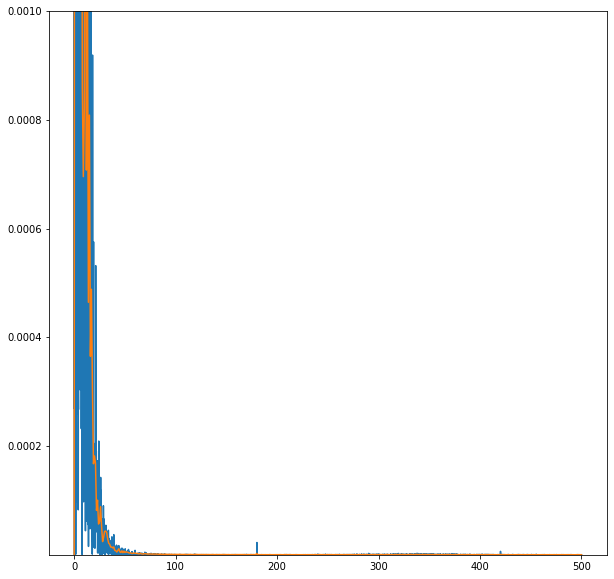

In [29]:
s = 1000
P = np.zeros(s // 2 + 1,)
for i in range(10):
    f, P_t = signal.periodogram(pol[s * i:s * (i + 1),0], fs=1000)
    P += P_t
    
plt.figure(figsize=(10,10))
plt.plot(*signal.periodogram(pol[:s * 10,0], fs=1000))
plt.plot(f, P / 10)
plt.ylim(1e-9, 1e-3)

(1e-10, 3.484452037395067)

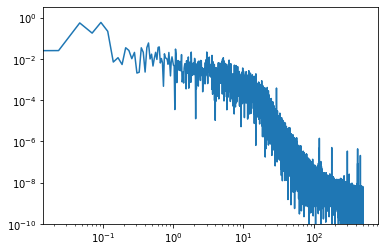

In [12]:
plt.loglog(*signal.periodogram(commands[:,0], fs=1000))
plt.ylim(1e-10)